# Анализ оттока клиентов банка

In [ ]:
"""
CustomerId — идентификатор клиента
Surname — фамилия клиента
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
Geography — страна клиента (банк международный)
Gender — пол клиента
Age — возраст клиента
Tenure — сколько лет клиент пользуется услугами банка
Balance — баланс на счетах клиента в банке
NumOfProducts — количество услуг банка, которые приобрёл клиент
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
EstimatedSalary — предполагаемая заработная плата клиента
Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)
"""

In [312]:

import pandas as pd
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('default')
import seaborn as sns

churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop(['RowNumber'], axis=1)
churn_data['Exited'] = churn_data['Exited'].apply(lambda num: "Churn" if num == 1 else "Loyal") 

display(churn_data.head())
display(churn_data.describe())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Churn
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,Loyal
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,Churn
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,Loyal
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,Loyal


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


''

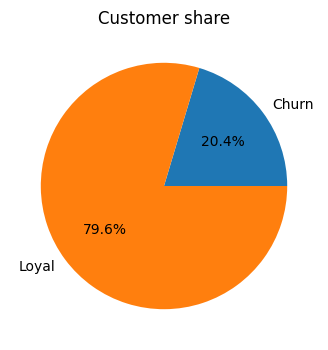

In [303]:
# 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению

cu_num = churn_data.groupby('Exited')['CustomerId'].count()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4))

axes.pie(
    cu_num,
    labels = cu_num.index,
    autopct='%.1f%%'
)
axes.set_title("Customer share")
;

In [ ]:
"""
    Сразу замечу, что задание построено некорректно, как минимум в смысле названий. Дальше будет видно, что у "ушедших" есть деньги на счетах.
    Единственный разумный вариант - это клиенты, проскоренные моделью оттока и склонные к оттоку. Поэтому я переназвал их в таблице Churn.
    20% клиентов банка, склонных к оттоку, - это печальное состояние клиентской базы, есть шанс потерять пятую часть прибыли в обозримом горизонте.
    Надо детальнее разоюраться с этими клиентами, чтобы понять, кто они, есть ли какой-то паттерн, может, есть что-то, что их объединят.
    И дальше, конечно, нужны данные по конкретным продуктам, которыми они пользовались, без этого картина будет очень урезанной.
"""

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: Balance, dtype: float64

''

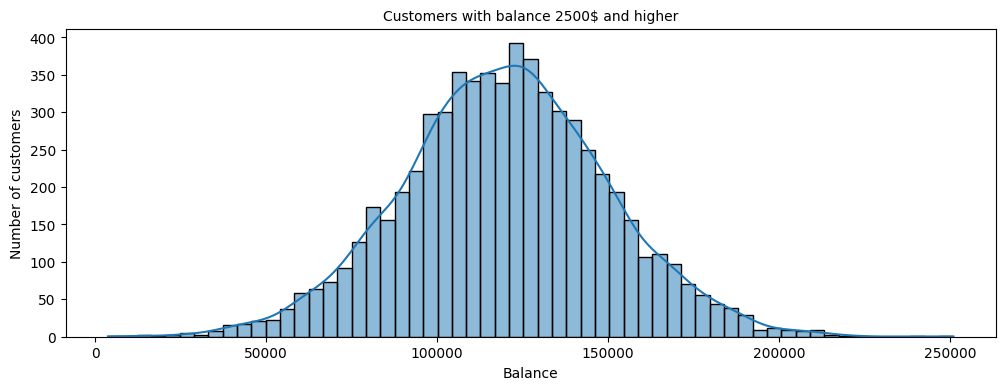

In [298]:
# 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2500$. 
# Опишите распределение и сделайте выводы.

cu_balance = churn_data[churn_data['Balance'] > 2500]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,4))

display(cu_balance['Balance'].describe())

sns.histplot(
    data=cu_balance,
    x='Balance',
    kde=True
)
axes.set_title('Customers with balance 2500$ and higher', fontsize=10)
axes.set_ylabel('Number of customers')
;

In [ ]:
"""
    В базе 6383 клиента, у которых на счету больше 2500$ (это 2/3 от всех). Минимальный баланс у таких клиентов 3768$, максимальный баланс 250 898$.
    Почти все клиенты попадают в диапазон от 50 000$ до 200 000$, большинство находится в группе от 100 000$ до 150 000$.
    Средний баланс средств на счету этих клиентов около 120 000$. Дальше надо разбираться со склонными к оттоку и лояльными.
"""

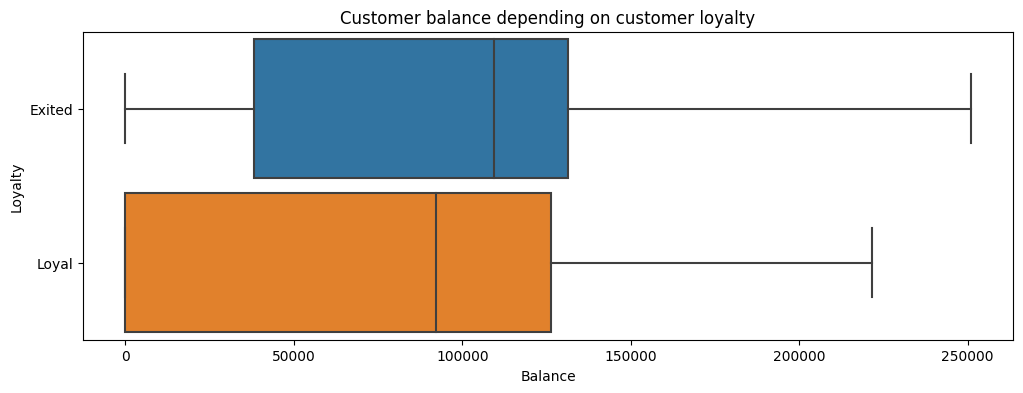

In [301]:
# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. 
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,4))

boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9
)

boxplot.set_title('Customer balance depending on customer loyalty');
boxplot.set_xlabel('Balance');
boxplot.set_ylabel('Loyalty');

In [ ]:
"""
Как я и говорил вначале, у "ушедших" клиентов есть деньги на балансе, поэтому они не ушедшие, а склонные к оттоку.
У склонных к оттоку разброс в количестве денег на счетах больше, но в основном это отдельные выбросы.
Большая часть счетов содержит от 40 до 130 тысяч долларов. В то время как у лояльных достаточно много клиентов с нулевыми счетами.
Средний остаток на балансе у отточников тоже выше - около 110 тысяц, в то время как у лояльных - около 90 тысяч.
Видно, что склонные к оттоку более премиальный сегмент.
"""

''

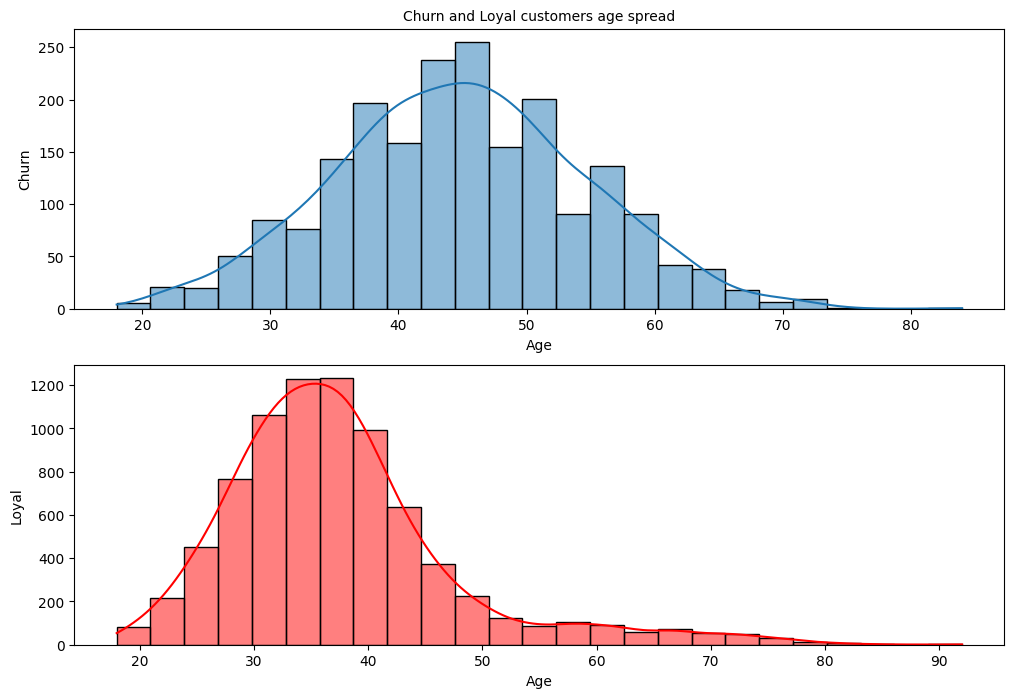

In [354]:
# 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? 
# На какую возрастную категорию клиентов стоит обратить внимание банку?

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

sns.histplot(
    data=churn_data[churn_data["Exited"] == 'Churn'],
    x='Age',
    bins=25, 
    kde=True, 
    ax=axes[0]
)
axes[0].set_title('Churn and Loyal customers age spread', fontsize=10)
axes[0].set_ylabel('Churn')

sns.histplot(
    data=churn_data[churn_data["Exited"] == 'Loyal'],
    x='Age',
    bins=25,
    kde=True,
    color='red',
    ax=axes[1]
)
axes[1].set_ylabel('Loyal')
;

In [ ]:
"""

"""